In [1]:
from datetime import datetime

import pandas
import matplotlib.pyplot as plt

from foo import *

In [2]:
vinzenz_score_log = load_score_log('PolyGenStats-vinzenz-scorelog.csv')
extend_score_log(vinzenz_score_log)
vinzenz_summary = generate_station_stats(vinzenz_score_log)

fiebertrauma_score_log = load_score_log('PolyGenStats-Fiebertrauma-scorelog.csv')
extend_score_log(fiebertrauma_score_log)
fiebertrauma_summary = generate_station_stats(fiebertrauma_score_log)

vinzenz_score_log

when  score    sourcename                  name  mapx  \
0   2025-08-08 20:14:00    100   First Visit             Info Desk   216   
1   2025-08-08 20:19:00    282       Capture             Info Desk   216   
2   2025-08-08 20:20:00     58       Capture             Info Desk   216   
3   2025-08-08 20:22:00    100   First Visit              Main Bar   190   
4   2025-08-08 20:23:00    100   First Visit            Badge Tent   328   
..                  ...    ...           ...                   ...   ...   
896 2025-08-12 13:34:00     91       Capture                    0E     0   
897 2025-08-12 13:39:00     50         Visit              Pixelbar   379   
898 2025-08-12 13:42:00    164  Output Boost             Site Sign   207   
899 2025-08-12 13:50:00    694       Capture              Pixelbar   379   
900 2025-08-12 14:00:00    284  Output Boost  Maker Days Eindhoven   115   

     mapy  accumulated_score  seconds          when_start  
0     505              100.0        0 2025-08-08 20:14:00  
1     505              382.0      282 2025-08-08 20:14:18  
2     505              440.0       58 2025-08-08 20:19:02  
3     570              540.0        0 2025-08-08 20:22:00  
4     607              640.0        0 2025-08-08 20:23:00  
..    ...                ...      ...                 ...  
896     0           588456.0       91 2025-08-12 13:32:29  
897   602           588506.0        0 2025-08-12 13:39:00  
898   874           588670.0     1640 2025-08-12 13:14:40  
899   602           589364.0      694 2025-08-12 13:38:26  
900   749           589648.0     2840 2025-08-12 13:12:40  

[901 rows x 9 columns]

In [3]:
vinzenz_seconds = generate_score_per_second(vinzenz_score_log)
fiebertrauma_seconds = generate_score_per_second(fiebertrauma_score_log)

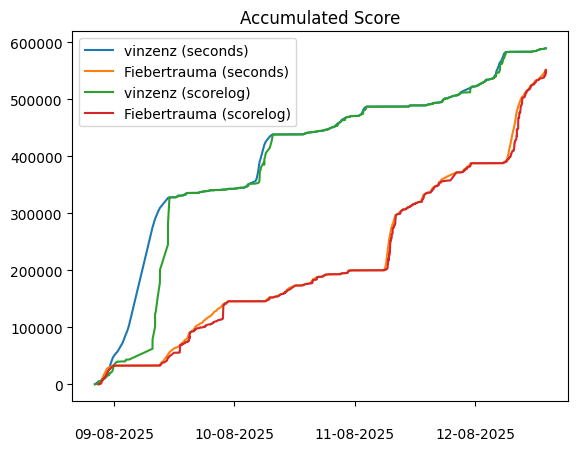

In [4]:
from matplotlib import dates

fig, ax = plt.subplots()
ax.plot('when', 'accumulated_score', data=vinzenz_seconds, label='vinzenz (seconds)')
ax.plot('when', 'accumulated_score', data=fiebertrauma_seconds, label='Fiebertrauma (seconds)')
ax.plot('when', 'accumulated_score', data=vinzenz_score_log, label='vinzenz (scorelog)')
ax.plot('when', 'accumulated_score', data=fiebertrauma_score_log, label='Fiebertrauma (scorelog)')

ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y'))
plt.title('Accumulated Score')
plt.legend()
plt.show()

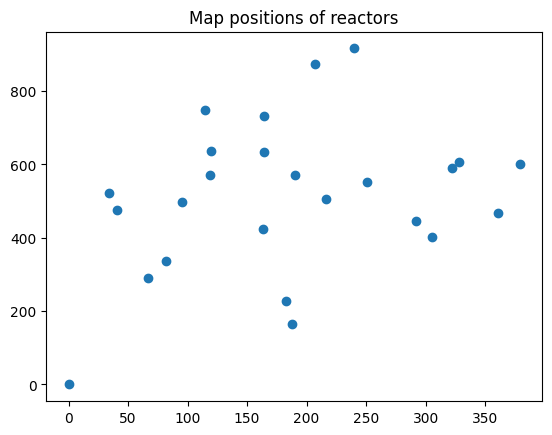

In [5]:
# TODO: add correctly cropped map as background
plt.scatter(vinzenz_summary['mapx'], vinzenz_summary['mapy'])
plt.title('Map positions of reactors')
plt.show()

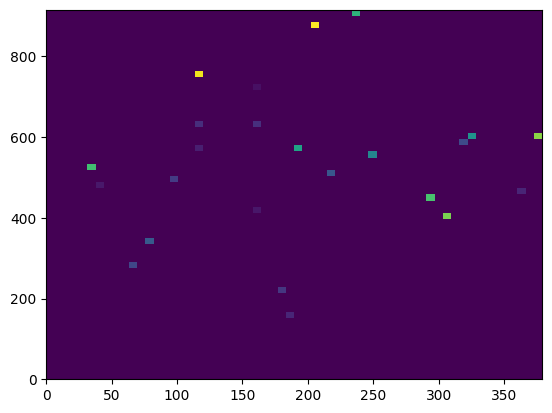

In [8]:
plt.hist2d('mapx', 'mapy', weights='score', data=vinzenz_score_log, density=False, bins=60)
plt.show()